## Integration with `matplotlib`

This package was primarily developed with the intent to be fully compatible with `matplotlib`, a popular Python package for graphics (including charts and maps). As such, it integrates into the package in a number of different ways, outlined below.

### `Color` objects

Two properties of a `Color` object, `hex` and `rgb` (as well as `rgba`), are directly or indirectly* accepted as inputs to `matplotlib`'s plotting functions, so long as they take a `color` argument of some sort.

\* Note that `matplotlib` expects RGB(A) tuples to be bound between 0 and 1, and so the actual RGB(A) values need to be divided by 255, as shown in the example below. This is a bit onerous, I would recommend just using the `hex` property instead. If there is a need for these RGB(A) values to be `matplotlib`-compatible by default, raise an issue and I will address it.

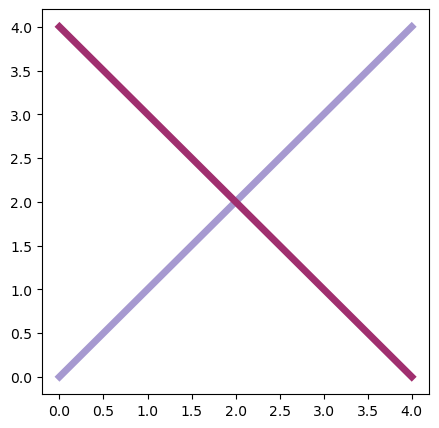

In [1]:
import matplotlib.pyplot
from flexoki import Flexoki

# Creating a simple line plot
fig, ax = matplotlib.pyplot.subplots(1,1, figsize=(5,5))
ax.plot([0,4],[0,4], color=Flexoki.colors.purple_300.hex, linewidth=5) # purple line going bottom-left to upper-right
ax.plot([0,4],[4,0], color=[c/255 for c in Flexoki.colors.magenta_600.rgb], linewidth=5) # magenta line going upper-left to bottom-right

### `Palette` objects

`Palette` objects are lists of `Color` objects; the `hex` and `rgb(a)` properties of `Palettes` make the underlying colors accessible by `matplotlib` in an *iterable* fashion, ex. when specifying the color of multiple bars.

<BarContainer object of 3 artists>

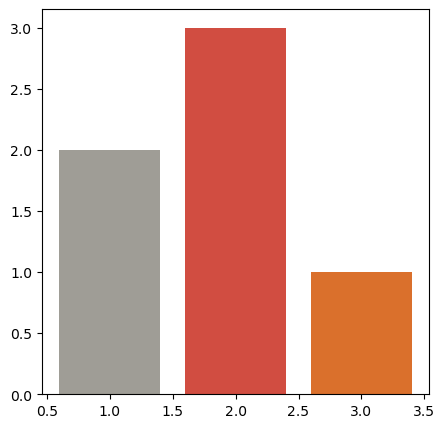

In [2]:
fig, ax = matplotlib.pyplot.subplots(1,1, figsize=(5,5))
ax.bar([1,2,3], height=[2,3,1], color=Flexoki.palettes.l400.hex()) # Note the palette is truncated to fit

### Named Colors and Colormaps

The "classic" way of accessing colors in `matplotlib` is via a simple string, such as `red` or `tab:blue`; these are referred to as ["named" colors](https://matplotlib.org/stable/gallery/color/named_colors.html). Colormaps (`matplotlib`'s term for palettes) are [similarly "named"](https://matplotlib.org/stable/gallery/color/colormap_reference.html).

Allowing the Flexoki schema to be accessible via name is also possible for both `Color`s and `Palette`s.

#### Registering Colors

Colors are "registered" (assigned names) with the function `register_matplotlib()`, which takes the following arguments:

- `colors`: a list of `Color` objects, or a list of `dictionary` objects of the form `{"name":"NAME","color":"HEX CODE"}`, or a list of list/tuples object of exactly length 2 (first key is `name`, second key is `hex code`); if `None` is passed, all colors available in `Flexoki.colors` will be registered.

- `prefix`: a string to affix to the front of each color to minimize the chances of overlaps; the default is `flexoki`, meaning colors will be accessed as `flexoki:red-50` or `flexoki:base-500`.

- `defaults`: if `True`, the "default" colors from the currently-specified `theme` will be registered as well, *under their shortened names* (so would be accessed as `flexoki:red` or `flexoki:cyan`); if `False`, default colors are not registered. Only works when `colors` is `None`!

In [3]:
Flexoki.register_matplotlib(colors=None, prefix="flexoki", defaults=True) # these are the default settings

<BarContainer object of 3 artists>

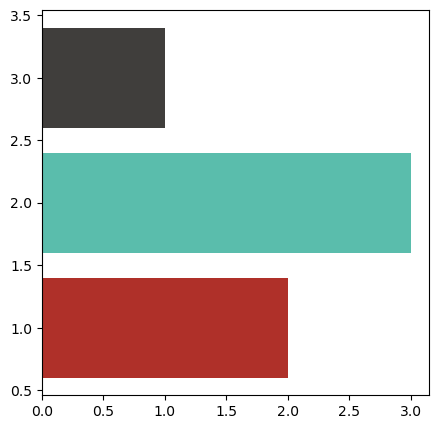

In [4]:
fig, ax = matplotlib.pyplot.subplots(1,1, figsize=(5,5))
ax.barh([1,2,3], width=[2,3,1], color=["flexoki:red","flexoki:cyan-300","flexoki:base-800"])

#### Registering Colormaps

Any `Palette` object, including the default ones, may be turned into a `colormap` with the function `to_colormap()`, which has two arguments:

- `kind`: if `discrete`, will create a `ListedColormap`, with clear breaks between each color; if `smooth`, will create a `LinearSegmentedColormap`, with a smooth transition between each color. Default is `discrete`.

- `register`: if `None`, will *not* register the palette with `matplotlib`. *This is the default behavior*. However, if it is *any string*, will register the colormap under that name.

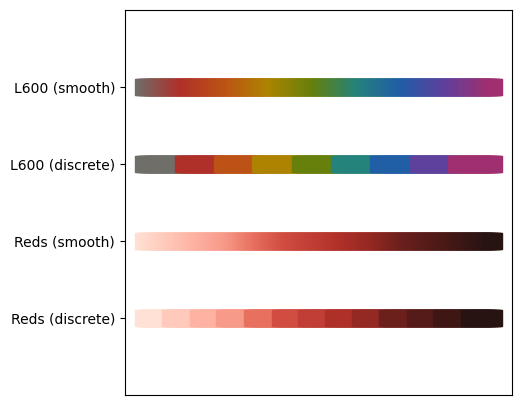

In [18]:
import numpy
# Displaying the difference between a Listed and LinearSegmented Colormap
fig, ax = matplotlib.pyplot.subplots(1,1, figsize=(5,5))
ax.set_ylim(0,5)
# Reds discrete
ax.scatter(numpy.arange(0,256),numpy.repeat([1],256),marker="s",s=120, 
           c=numpy.arange(0,256), cmap=Flexoki.palettes.reds.to_colormap(kind="discrete"))
# Reds smooth
ax.scatter(numpy.arange(0,256),numpy.repeat([2],256),marker="s",s=120, 
           c=numpy.arange(0,256), cmap=Flexoki.palettes.reds.to_colormap(kind="smooth"))
# Spectra discrete
ax.scatter(numpy.arange(0,256),numpy.repeat([3],256),marker="s",s=120, 
           c=numpy.arange(0,256), cmap=Flexoki.palettes.l600.to_colormap(kind="discrete"))
# Spectra smooth
ax.scatter(numpy.arange(0,256),numpy.repeat([4],256),marker="s",s=120, 
           c=numpy.arange(0,256), cmap=Flexoki.palettes.l600.to_colormap(kind="smooth"))
# Some general formatting
ax.set_xticks([])
_ = ax.set_yticks([1,2,3,4],["Reds (discrete)", "Reds (smooth)", "L600 (discrete)", "L600 (smooth)"])

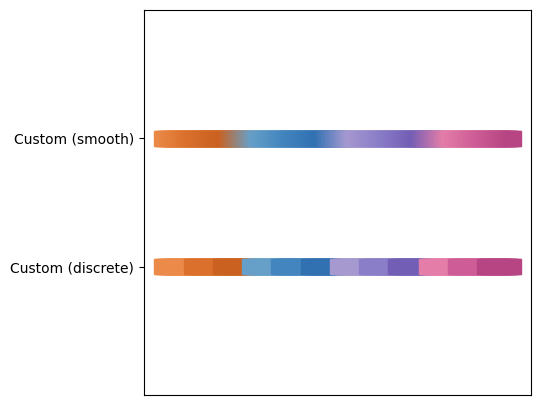

In [19]:
# Demonstrating colormap registration
# Creating a custom Palette
pd = (Flexoki.filter(h="obpm", l=range(300,500), order="h_l")
      .to_colormap(kind="discrete", register="custom_discrete_colormap"))
ps = (Flexoki.filter(h="obpm", l=range(300,500), order="h_l")
      .to_colormap(kind="smooth", register="custom_smooth_colormap"))

# Same code as above, but the cmap is named instead
fig, ax = matplotlib.pyplot.subplots(1,1, figsize=(5,5))
ax.set_ylim(0,3)
ax.scatter(numpy.arange(0,256),numpy.repeat([1],256),marker="s",s=120, 
           c=numpy.arange(0,256), cmap="custom_discrete_colormap")
ax.scatter(numpy.arange(0,256),numpy.repeat([2],256),marker="s",s=120, 
           c=numpy.arange(0,256), cmap="custom_smooth_colormap")
# Some general formatting
ax.set_xticks([])
_ = ax.set_yticks([1,2],["Custom (discrete)", "Custom (smooth)"])